In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os

os.chdir('G:\My Drive\Prep\Prep\Logistic_regression_proj_2')

# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Check the shape and type of your dataset
print(df.shape)

(5110, 12)


In [17]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [18]:
# Check for null values
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [19]:
df['bmi'].mean()

28.893236911794666

In [20]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [21]:
# Check for null values
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [22]:
df.shape

(5110, 12)

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [10]:
# # Drop the missing values
# df.dropna(inplace=True)

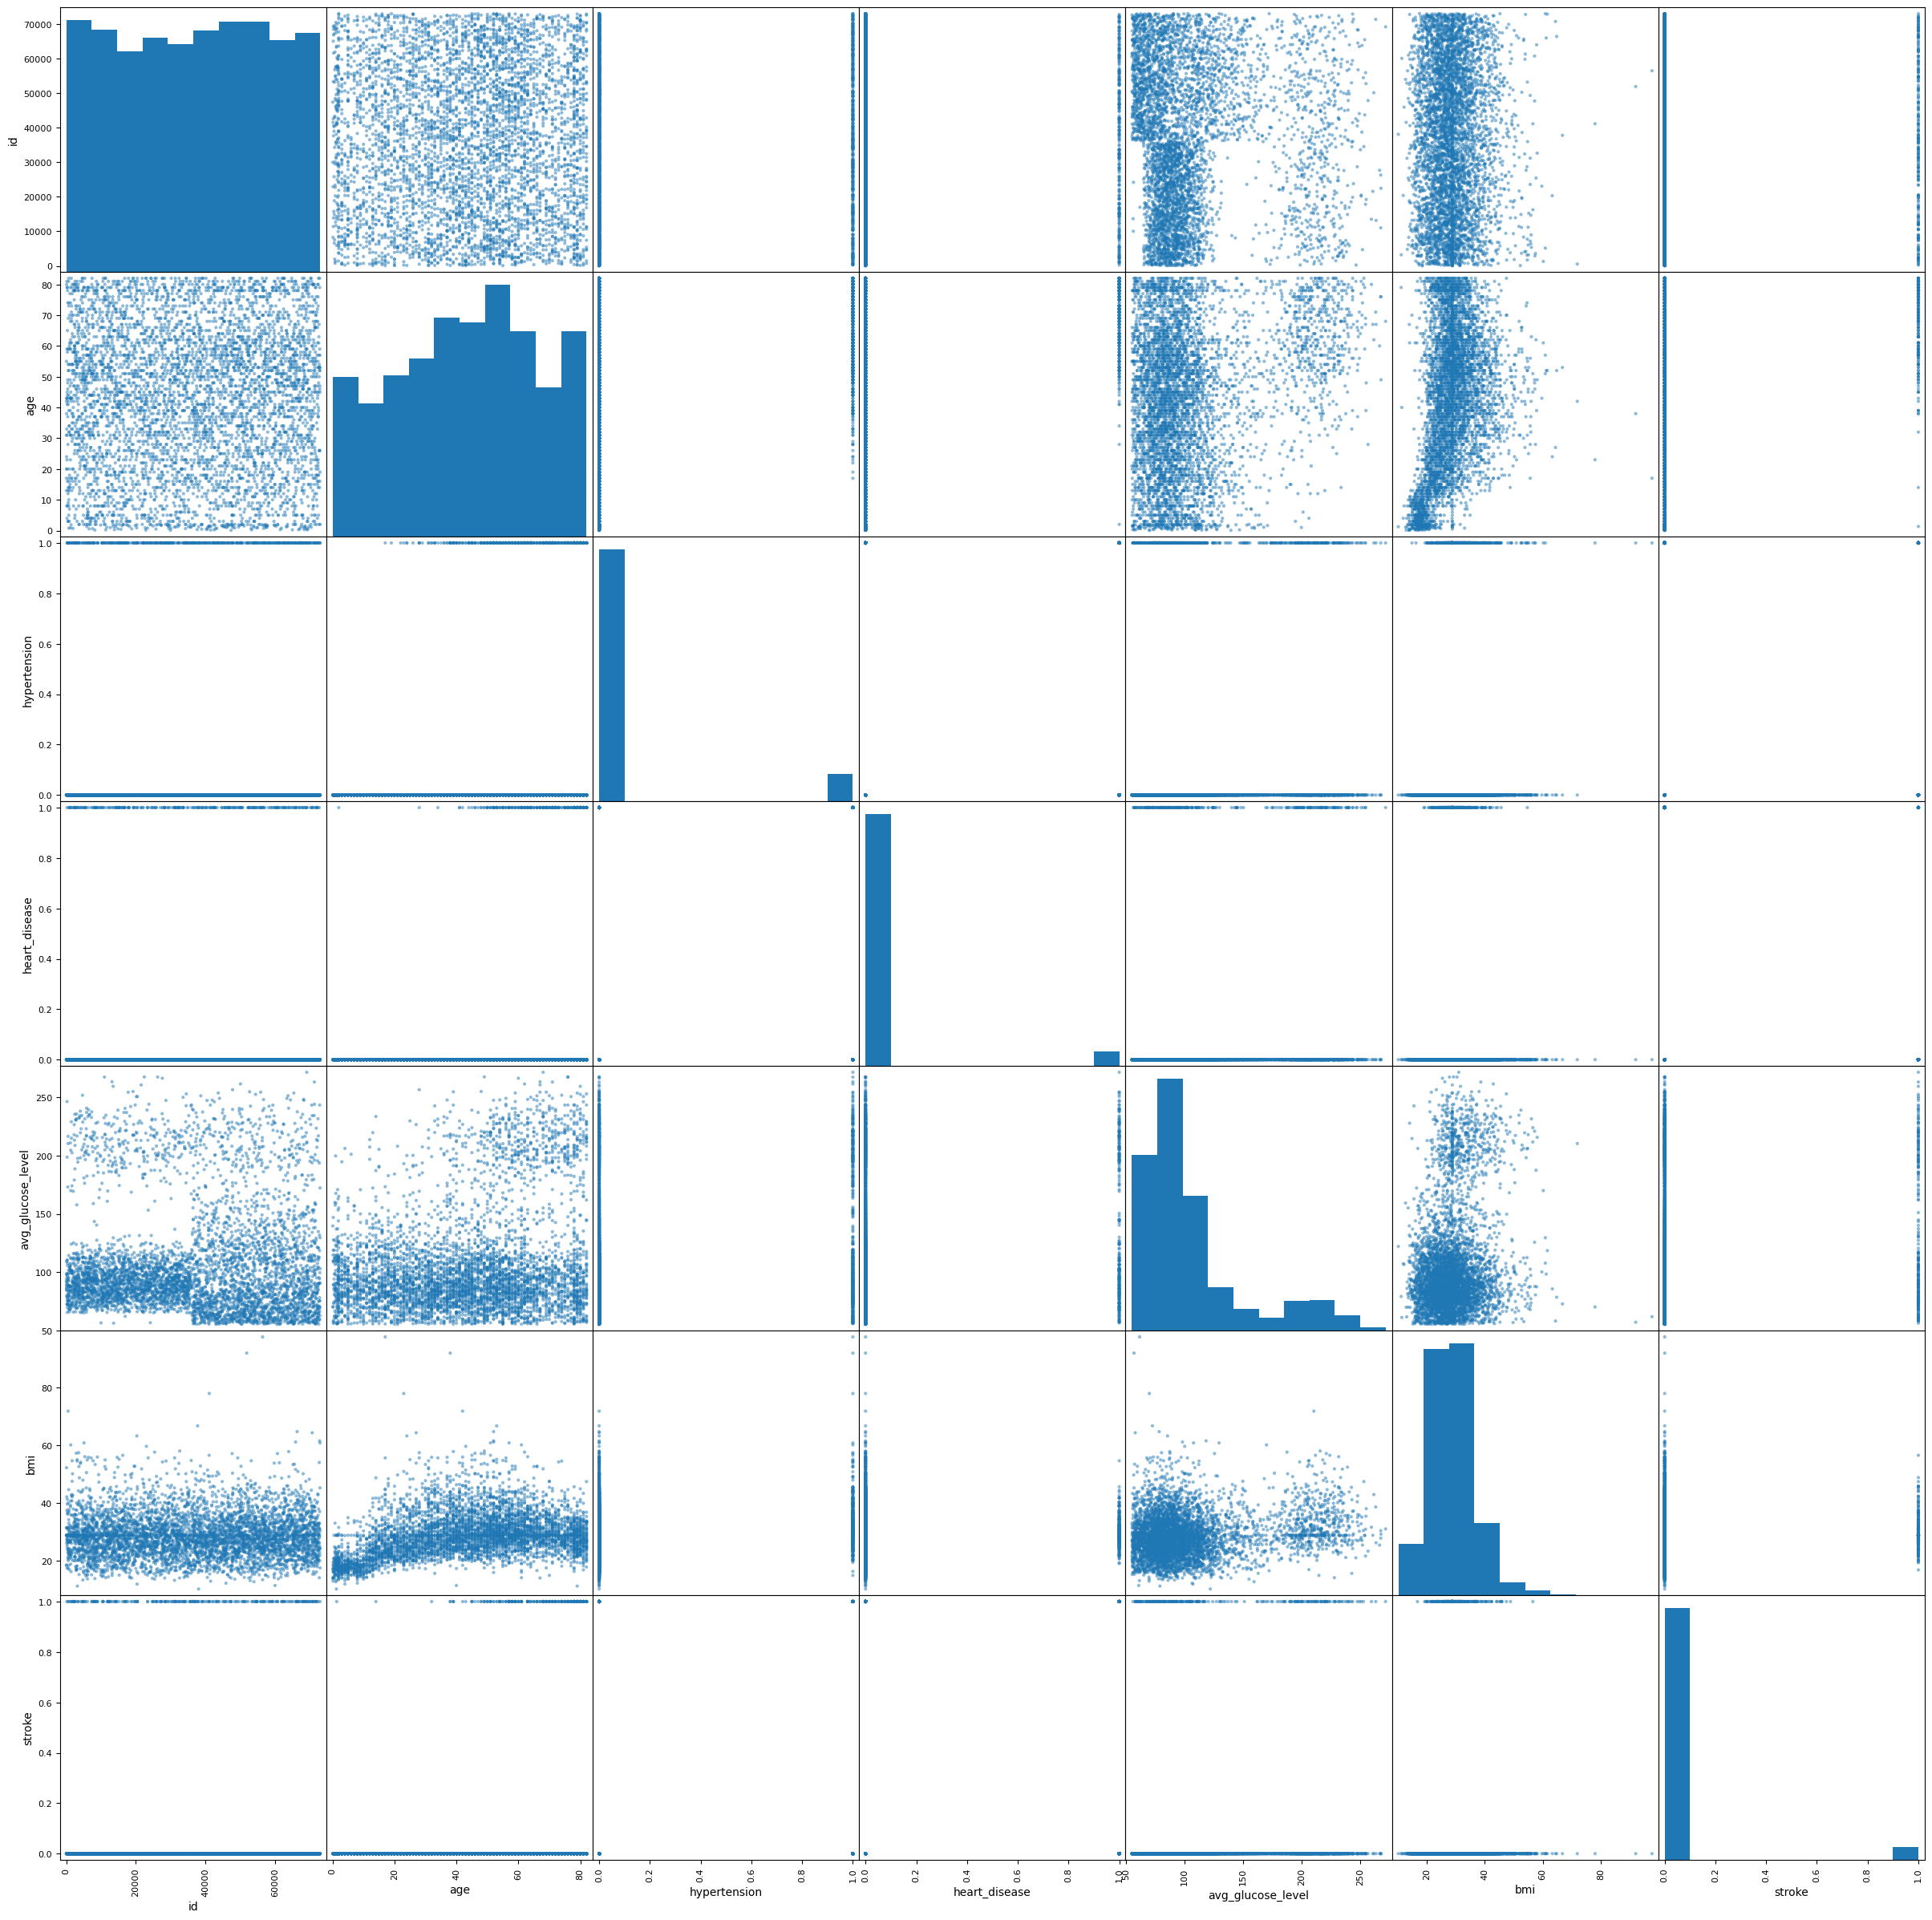

In [24]:
# EDA: Visualize the data
pd.plotting.scatter_matrix(df, figsize = [30,30])
plt.show()

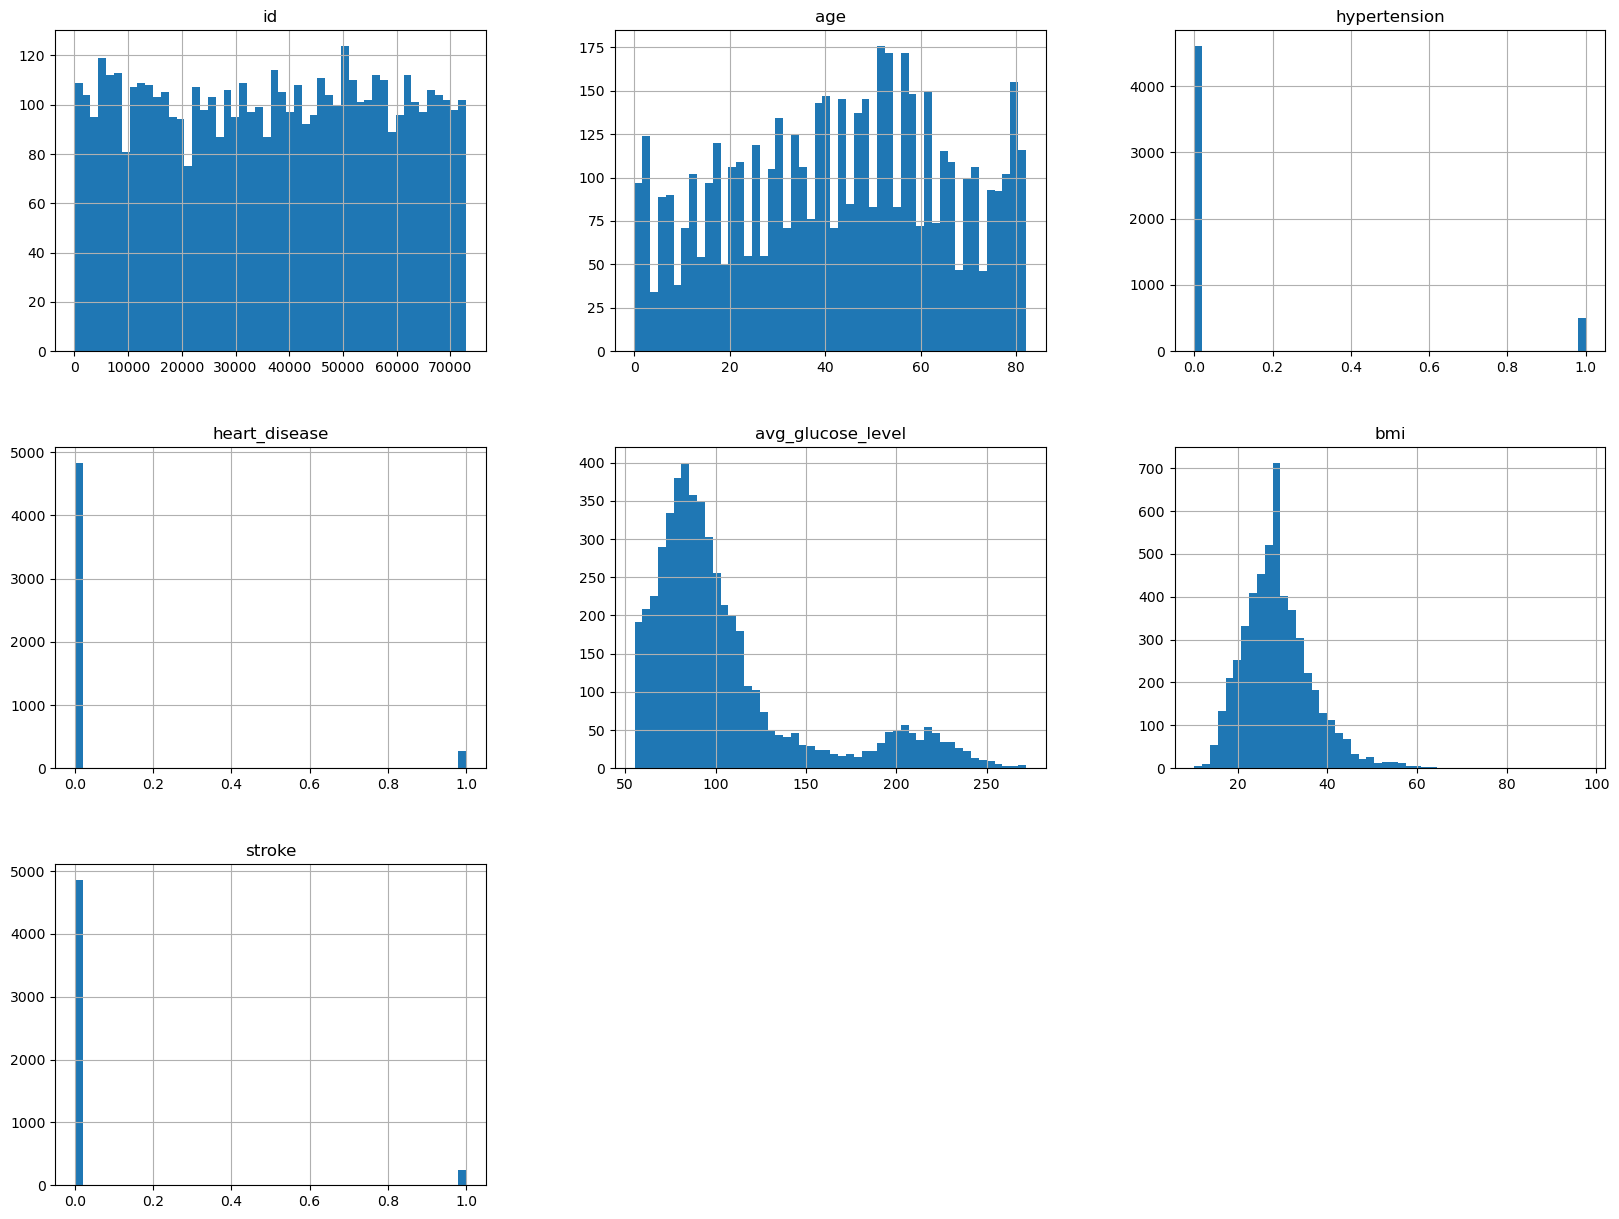

In [25]:
# Histogram distribution of the features
df.hist(bins=50, figsize=(20,15))
plt.show()


In [82]:

# Split the dataset into features and target variable
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape, X_test.shape

((4088, 10), (1022, 10))

In [84]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked
3927,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown
2337,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked
3910,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked
1886,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked


In [85]:
df_encoded = pd.get_dummies(df, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
df_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.000000,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.600000,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.600000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [86]:
X_train_encoded = pd.get_dummies(X_train, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
X_train_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
802,79.0,0,0,112.64,28.5,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False
3927,62.0,0,0,88.32,36.3,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False
2337,21.0,0,0,59.52,33.7,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
3910,31.0,0,0,65.70,30.4,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False
1886,31.0,0,0,59.63,19.9,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False


In [87]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,Male,31.00,0,0,No,Self-employed,Rural,64.85,23.000000,Unknown
4478,Male,40.00,0,0,Yes,Self-employed,Rural,65.29,28.300000,never smoked
3849,Female,8.00,0,0,No,children,Urban,74.42,22.500000,Unknown
4355,Female,79.00,1,0,Yes,Self-employed,Rural,76.64,19.500000,never smoked
3826,Female,75.00,0,0,Yes,Govt_job,Rural,94.77,27.200000,never smoked
...,...,...,...,...,...,...,...,...,...,...
3605,Male,1.88,0,0,No,children,Rural,143.97,28.893237,Unknown
4934,Male,1.32,0,0,No,children,Rural,107.02,28.893237,Unknown
4835,Male,49.00,1,0,Yes,Self-employed,Rural,119.30,30.400000,formerly smoked
4105,Female,56.00,0,0,No,Self-employed,Urban,128.63,24.900000,smokes


In [88]:
X_test_encoded = pd.get_dummies(X_test, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
X_test_encoded=X_test_encoded.drop('gender_Other', axis=1)
X_test_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4688,31.0,0,0,64.85,23.0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False
4478,40.0,0,0,65.29,28.3,False,True,False,True,False,False,False,True,False,True,False,False,False,True,False
3849,8.0,0,0,74.42,22.5,True,False,True,False,False,False,False,False,True,False,True,True,False,False,False
4355,79.0,1,0,76.64,19.5,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False
3826,75.0,0,0,94.77,27.2,True,False,False,True,True,False,False,False,False,True,False,False,False,True,False


In [89]:
# Standardize the features
sc = StandardScaler()
sc=sc.fit(X_train_encoded)
X_train = sc.transform(X_train_encoded)
X_test = sc.transform(X_test_encoded)

In [90]:
X_train.shape, X_test.shape

((4088, 20), (1022, 20))

In [91]:
X_train

array([[ 1.58415472, -0.32198091, -0.23618875, ...,  2.17751533,
        -0.76412186, -0.42923306],
       [ 0.82970766, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186, -0.42923306],
       [-0.98984115, -0.32198091, -0.23618875, ..., -0.45923902,
         1.30869178, -0.42923306],
       ...,
       [-1.87032526, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186, -0.42923306],
       [ 1.62853396, -0.32198091, -0.23618875, ...,  2.17751533,
        -0.76412186, -0.42923306],
       [ 0.11963983, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186,  2.32973667]])

In [92]:
# Create a Logistic Regression classifier
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [93]:
y_test.shape,X_test.shape

((1022,), (1022, 20))

In [94]:
X_test

array([[-0.54604876, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186, -0.42923306],
       [-0.14663561, -0.32198091, -0.23618875, ..., -0.45923902,
         1.30869178, -0.42923306],
       [-1.56677126, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186, -0.42923306],
       ...,
       [ 0.25277755,  3.10577419, -0.23618875, ...,  2.17751533,
        -0.76412186, -0.42923306],
       [ 0.56343222, -0.32198091, -0.23618875, ..., -0.45923902,
        -0.76412186,  2.32973667],
       [ 1.53977548,  3.10577419,  4.23390197, ..., -0.45923902,
         1.30869178, -0.42923306]])

In [95]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [96]:

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression classifier: {accuracy}')

Accuracy of logistic regression classifier: 0.9393346379647749


[[960   0]
 [ 62   0]]


<Axes: >

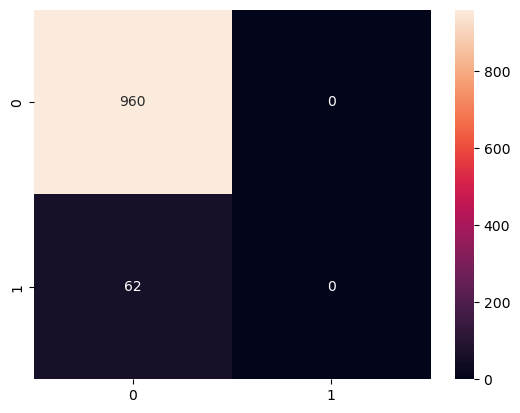

In [101]:
# Calculate the confusion matrix
import seaborn as sns

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# # Calculate the precision, recall, and F1 score
# precision = metrics.precision_score(y_test, y_pred)
# recall = metrics.recall_score(y_test, y_pred)
# f1_score = metrics.f1_score(y_test, y_pred)

# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1_score}')

#Plot the confution matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [103]:
classifier

LogisticRegression(random_state=10)

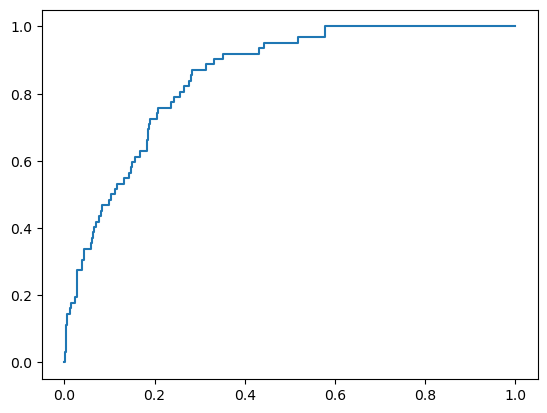

In [104]:
# plot the ROC curve
# import metrics

import matplotlib.pyplot as plt

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.show()

In [105]:
import pickle as pkl

pkl.dump(classifier, open('model_1.pkl', 'wb'))